### Black Friday Dataset EDA And Feature Engineering
# Cleaning and preparing the data for model training

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Problem Statement**

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now they want to build a model that predict the purchase amount of customer against various product which will help them to create personalized offer to customers against different product

In [4]:
#importing the dataset
df_train=pd.read_csv('black friday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
#importing test data
df_test=pd.read_csv('black friday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#merging both train and test dataset
df=df_train.append(df_test)
df.head()

<ipython-input-6-ecbde84aa926>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640167 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     640167 non-null  int64  
 1   Product_ID                  640167 non-null  object 
 2   Gender                      640167 non-null  object 
 3   Age                         640167 non-null  object 
 4   Occupation                  640167 non-null  int64  
 5   City_Category               640167 non-null  object 
 6   Stay_In_Current_City_Years  640167 non-null  object 
 7   Marital_Status              640167 non-null  int64  
 8   Product_Category_1          640167 non-null  int64  
 9   Product_Category_2          441696 non-null  float64
 10  Product_Category_3          195477 non-null  float64
 11  Purchase                    406568 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 63.5+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.401670e+05,640167.000000,640167.000000,640167.000000,441696.000000,195477.000000,406568.000000
mean,1.002984e+06,8.081416,0.410157,5.289185,9.848991,12.660139,9326.147306
std,1.730423e+03,6.523240,0.491862,3.743867,5.091253,4.127792,4975.886287
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001466e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003000e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004447e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12066.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
df.drop(['User_ID'],axis=1,inplace=True)
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
pd.get_dummies(df['Gender'])


,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [11]:
# Handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
#Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4, '46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
#fixing categorical City_Category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [15]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
#  drop city_category feature
df.drop('City_Category',axis=1,inplace=True)   ## aixs=1 means column wise & #axis=0 row wise


In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
## Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            198471
Product_Category_3            444690
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].value_counts()


8.0     74702
14.0    64770
2.0     57878
16.0    50750
15.0    44603
5.0     30545
4.0     30224
6.0     19356
11.0    16612
17.0    15708
13.0    12395
9.0      6693
12.0     6411
10.0     3622
3.0      3404
18.0     3331
7.0       692
Name: Product_Category_2, dtype: int64

In [22]:
df['Product_Category_2'].mode()[0]

8.0

In [23]:
## Replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])  ## this is the way to remove missing values from dataset

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            444690
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
df['Product_Category_3'].value_counts()

16.0    38153
15.0    32758
14.0    21546
5.0     19569
17.0    19557
8.0     14773
9.0     13670
12.0    10807
13.0     6413
6.0      5665
18.0     5421
4.0      2210
11.0     2138
10.0     2058
3.0       739
Name: Product_Category_3, dtype: int64

In [27]:
df['Product_Category_3'].mode(0)

0   NaN
Name: Product_Category_3, dtype: float64

In [28]:
## Replacing the missing value with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
df['Product_Category_3'].isnull().sum()

0

In [29]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
## Replacing +4 with 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-32-d46518bd403d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640167 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  640167 non-null  object 
 1   Gender                      640167 non-null  int64  
 2   Age                         640167 non-null  int64  
 3   Occupation                  640167 non-null  int64  
 4   Stay_In_Current_City_Years  640167 non-null  object 
 5   Marital_Status              640167 non-null  int64  
 6   Product_Category_1          640167 non-null  int64  
 7   Product_Category_2          640167 non-null  float64
 8   Product_Category_3          640167 non-null  float64
 9   Purchase                    406568 non-null  float64
 10  B                           640167 non-null  uint8  
 11  C                           640167 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 54.9+ MB


In [35]:
## Convert objects into intger
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640167 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  640167 non-null  object 
 1   Gender                      640167 non-null  int64  
 2   Age                         640167 non-null  int64  
 3   Occupation                  640167 non-null  int64  
 4   Stay_In_Current_City_Years  640167 non-null  int64  
 5   Marital_Status              640167 non-null  int64  
 6   Product_Category_1          640167 non-null  int64  
 7   Product_Category_2          640167 non-null  float64
 8   Product_Category_3          640167 non-null  float64
 9   Purchase                    406568 non-null  float64
 10  B                           640167 non-null  uint8  
 11  C                           640167 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 54.9+ MB


In [36]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640167 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  640167 non-null  object 
 1   Gender                      640167 non-null  int64  
 2   Age                         640167 non-null  int64  
 3   Occupation                  640167 non-null  int64  
 4   Stay_In_Current_City_Years  640167 non-null  int64  
 5   Marital_Status              640167 non-null  int64  
 6   Product_Category_1          640167 non-null  int64  
 7   Product_Category_2          640167 non-null  float64
 8   Product_Category_3          640167 non-null  float64
 9   Purchase                    406568 non-null  float64
 10  B                           640167 non-null  int64  
 11  C                           640167 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 63.5+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

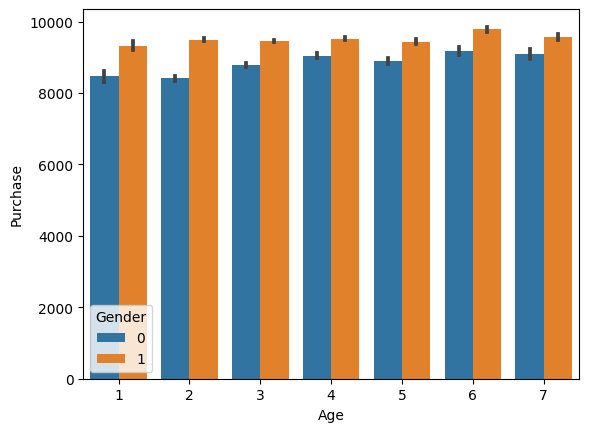

In [37]:
## Visualisation of Age Vs Purchase
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)


**Purchasing of men is high then women**

Text(0.5, 1.0, 'Purchase with respect to Occupation')

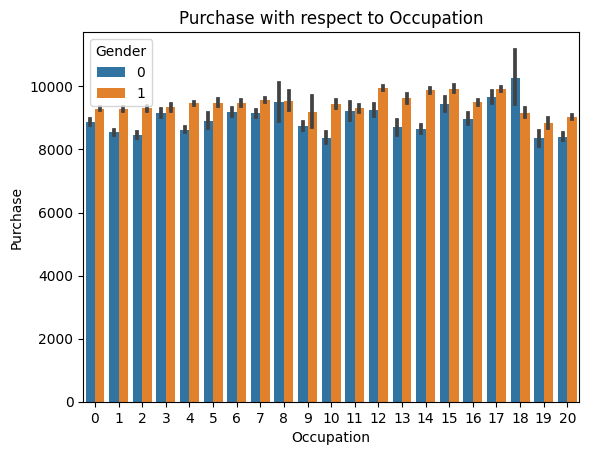

In [38]:
##Visualisation of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
plt.title("Purchase with respect to Occupation")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

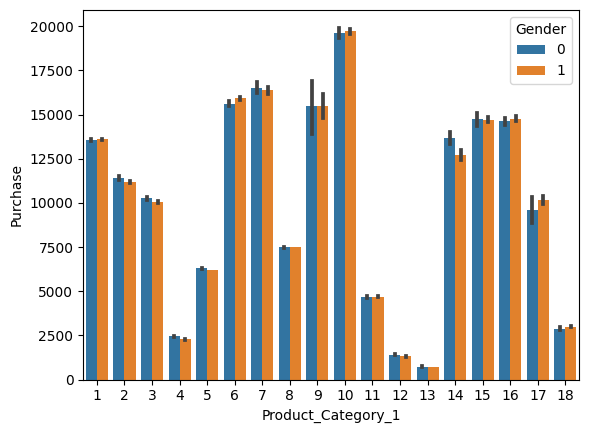

In [39]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

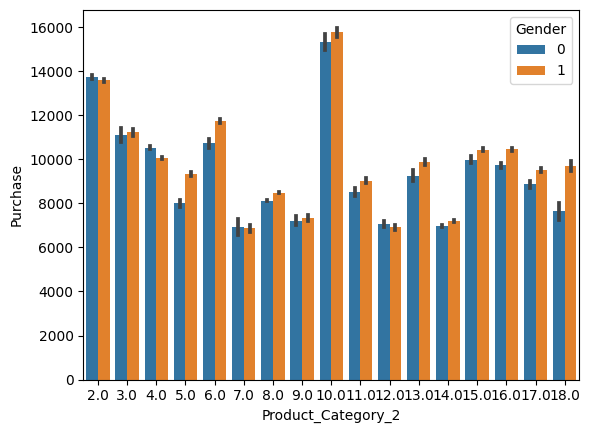

In [40]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

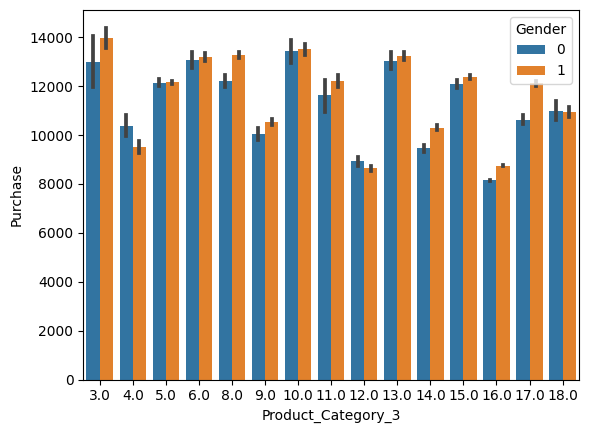

In [41]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)


In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
## Feature Scaling
df_test=df[df['Purchase'].isnull()]

In [44]:
## Feature Scaling
df_train=df[~df['Purchase'].isnull()]

In [52]:
X=df_train.drop('Purchase',axis=1)

In [53]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [54]:
X.shape

(406568, 11)

In [49]:
y=df_train['Purchase']

In [50]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
406563    11922.0
406564     7922.0
406565    11500.0
406566    15617.0
406567    15785.0
Name: Purchase, Length: 406568, dtype: float64

In [51]:
y.shape

(406568,)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
   X,y,test_size=0.33,random_state=42 )


In [58]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [60]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)